<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project-5/Assingment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the keras library if not already installed and then importing it.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Importing the numpy library to be used later, and importing the models and differnt functions of keras library , and the mnist dataset.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

This cell is for loading the training as well as testing dataset in the specific lists. The dataset is download from and amazon storage bucket and is loaded in the defined variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The shape (no. of images and size of the image) of the training dataset is printed. We import pyplot package from matplotlib library to plot the image in the notebook. the next line is a magic function ."%" is inline magic function used to plot in the notebook instead of creating new window. we are showing the first image fron the 60000 in thetraining dataset.

(60000, 28, 28)


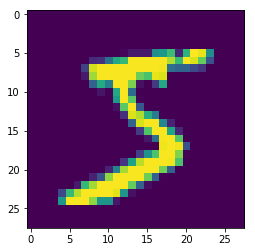

In [29]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In this cell, the test as well as training dataset's shape is modified using reshape function because the dataset loaded was 2 dimensional vector and for convolution we require 3-d vector(i.e height x width of image plus no of channels). In reshape function we are defining no. of input channel as 1.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In this cell, we change the datatype of the dataset to float and then the pixel value of each image in training and testing datasets are normalized(i.e. between 0 & 1).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In this cell, we are printing the classes of 1st 10 images of training dataset,

In [32]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In, the cell we are coverting the y_train and y_test data into categorical data(i.e for each image there is array of 10 values representing either 0 or 1, telling image belong to which class). Only 1 out of 10 values can be 1. We using numpy to perform this action.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In this cell, we are printing the categorical value of 1st 10 images of training dataset.

In [34]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, Y_train, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_test, Y_test, batch_size=64)
# get a batch
testX, testy = iterator.next()
# pixel stats in the batch
print(testX.shape, testX.mean(), testX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_test, Y_test, batch_size=len(X_test), shuffle=False)
# get a batch
testX, testy = iterator.next()
# pixel stats in the batch
print(testX.shape, testX.mean(), testX.std())




Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) -0.012833156 0.9874655
(60000, 28, 28, 1) -4.9324944e-07 0.9999959
Data Generator mean=0.133, std=0.310
(64, 28, 28, 1) -0.024617376 0.9720879
(10000, 28, 28, 1) -2.0761392e-07 0.9999966


This is the cell where are model and its layers are defined. We are defining sequential model.
Initial input to the model is (28x28)x1.

In [15]:
from keras.layers import Activation, MaxPooling2D, BatchNormalization, Dropout, regularizers

model = Sequential() 

model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1),use_bias=False)) # input=(28x28)      receptive field = 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,use_bias=False,kernel_regularizer=regularizers.l2(0.01)))                        # input=(26x26)     receptive field = 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3,use_bias=False,kernel_regularizer=regularizers.l2(0.01)))                       # input=(24x24)     receptive field = 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2)))                                    # input=(22x22)    receptive field = 14x14
model.add(Convolution2D(8,1,use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Convolution2D(8, 3, 3,use_bias=False,kernel_regularizer=regularizers.l2(0.01)))                       # input=(11x11)    receptive field = 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3,use_bias=False,kernel_regularizer=regularizers.l2(0.01)))                       # input=(9x9)    receptive field = 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3,use_bias=False,kernel_regularizer=regularizers.l2(0.01)))                      # input=(7x7)    receptive field = 20x20
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 5, 5, activation='relu',use_bias=False))                      # input=(5x5)     receptive field = 22x22
model.add(Flatten()) 
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `C

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), activation="relu", use_bias=False)`


Here we compile our model and configure its learning process . we pass 3 arguments,i.e. optimizer, loss function and metrics.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

filepath="saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
lr=LearningRateScheduler(scheduler, verbose=1)
callbacks_list = [checkpoint,lr]

In this cell, we train our model on training dataset , by dividing it into batches of size 512 each. The model is trained 40 times on dataset. i.e. it will go over all images 40 times(epochs) and best model is saved.

In [17]:
model.fit(batchX, batchy, batch_size=128, epochs=40, verbose=1, validation_data=(testX, testy), callbacks= callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 140us/step - loss: 0.3978 - acc: 0.9374 - val_loss: 0.4090 - val_acc: 0.8880

Epoch 00001: val_acc improved from -inf to 0.88800, saving model to saved.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 98us/step - loss: 0.1240 - acc: 0.9775 - val_loss: 0.1115 - val_acc: 0.9789

Epoch 00002: val_acc improved from 0.88800 to 0.97890, saving model to saved.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 95us/step - loss: 0.0984 - acc: 0.9822 - val_loss: 0.1129 - val_acc: 0.9761

Epoch 00003: val_acc did not improve from 0.97890
Epoch 4/40

Epoch 00004: LearningRateScheduler setting lea

In this cell we evaluate our trained model whose output will be accuracy and loss on the test dataset.

In [0]:
from keras.models import load_model
model = load_model('saved.hdf5')
score = model.evaluate(testX, testy, verbose=0)


Print the score calculated in previous cell

In [27]:
print(score)

[0.028852013839781285, 0.9949]


Here we are creating a new list y_pred and initilizing it with prediction values of each test image by our model in categorical form.

In [0]:
y_pred = model.predict(X_test)

printing the prediction and actual class of first 10 test images

In [37]:
print(y_pred[:9])
print(y_test[:9])

[[4.1327789e-07 5.5814712e-06 4.6555974e-06 7.4592099e-06 4.1327789e-07
  6.5055019e-07 4.1327789e-07 9.9997878e-01 4.1327789e-07 1.2912859e-06]
 [8.5267320e-06 5.7260957e-02 9.4254297e-01 7.2310731e-06 7.2310731e-06
  7.2310731e-06 1.4419481e-04 7.2310731e-06 7.2310731e-06 7.2310731e-06]
 [1.9205245e-06 9.9949861e-01 1.2694769e-05 1.9205245e-06 1.9205245e-06
  5.8782230e-06 1.9205245e-06 4.7123723e-04 1.9205245e-06 1.9205245e-06]
 [9.9919790e-01 3.0016181e-05 3.0016181e-05 3.0016181e-05 6.5973880e-05
  3.4932400e-05 3.9931104e-04 5.5450721e-05 3.0016181e-05 1.2635862e-04]
 [3.0127787e-06 3.0127787e-06 3.0127787e-06 3.0127787e-06 9.9964404e-01
  3.0127787e-06 1.8832327e-05 3.0127787e-06 3.0127787e-06 3.1616801e-04]
 [1.5915924e-06 9.9897361e-01 6.3354382e-06 1.5915924e-06 1.5915924e-06
  1.5915924e-06 1.5915924e-06 1.0088875e-03 1.5915924e-06 1.5915924e-06]
 [1.0678926e-05 8.0925768e-04 1.0678926e-05 1.0678926e-05 9.9754697e-01
  2.0582069e-05 1.0678926e-05 1.0648774e-03 1.4031160e-05 

In [39]:
l=[]
misclassified = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
for i in range(25):
  l.append(misclassified[0][i])
print(l) 

[87, 115, 209, 226, 247, 259, 266, 290, 321, 324, 326, 435, 445, 447, 449, 511, 543, 582, 659, 691, 844, 882, 924, 936, 938]


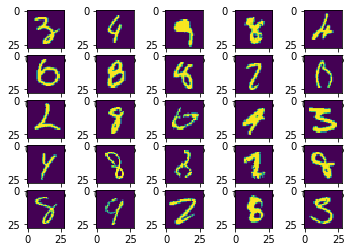

In [41]:

from matplotlib import pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for idx in range(25):
  v=l[idx]
  plt.subplot(5,5,idx+1)
  plt.imshow(X_test[v])